# Data extraction

### Concatenation of T1, T2 and T1C+

In [6]:
import os
import shutil

# Define source and destination directories
source_base_dir = "C:/Users/Emilio Venegas/Documents/python/glioma/cancer_images"
destination_base_dir = "C:/Users/Emilio Venegas/Documents/python/glioma/concatenated_images"

# List of classes (folders)
classes = ['_NORMAL', 'Ependimoma', 'Germinoma', 'Granuloma', 'Neurocitoma', 'Schwannoma', 
           'Astrocitoma', 'Ganglioglioma', 'Glioblastoma', 'Meduloblastoma', 'Oligodendroglioma']

# Concatenate images for each class
for class_name in classes:
    # Create destination folder if not exists
    destination_folder = f"{destination_base_dir}/{class_name}"
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through source folders and copy images
    for folder_name in ['T1', 'T2', 'T1C+']:
        source_folder = f"{source_base_dir}/{class_name} {folder_name}"
        if os.path.exists(source_folder):
            for filename in os.listdir(source_folder):
                # Construct source and destination paths
                source_path = f"{source_folder}/{filename}"
                destination_path = f"{destination_folder}/{filename}"
                
                # Copy image to destination folder
                shutil.copyfile(source_path, destination_path)
                #print(f"Copied {filename} to {destination_folder}")
        else:
            print(f"Folder {source_folder} does not exist.")

print("Concatenation completed.")


Folder C:/Users/Emilio Venegas/Documents/python/glioma/cancer_images/_NORMAL T1C+ does not exist.
Concatenation completed.


### Rename and change to png

In [7]:
import os

# Path to the directory containing the images
path = "C:/Users/Emilio Venegas/Documents/python/glioma/concatenated_images"

# Function to rename files
def rename_files(directory):
    for subdir, dirs, files in os.walk(directory):
        for i, filename in enumerate(files, start=1):
            class_name = os.path.basename(subdir)
            new_filename = f"{class_name}{i}.png"
            old_path = f"{subdir}/{filename}"
            new_path = f"{subdir}/{new_filename}"
            os.rename(old_path, new_path)

# Rename files in the specified directory
rename_files(path)


### Data augmentation

In [48]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def process_images(directory, output_directory):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    # Define data augmentation parameters
    datagen = ImageDataGenerator(
        
        zoom_range=0.2,
        horizontal_flip=True
        
    )
    
    # Iterate through each subdirectory (class folder)
    for subdir in os.listdir(directory):
        subdir_path = f"{directory}/{subdir}"
        output_subdir_path = f"{output_directory}/{subdir}"
        
        # Create output subdirectory if it doesn't exist
        if not os.path.exists(output_subdir_path):
            os.makedirs(output_subdir_path)
        
        # Iterate through each image file in the subdirectory
        for filename in os.listdir(subdir_path):
            filepath = f"{subdir_path}/{filename}"
            output_filepath = f"{output_subdir_path}/{filename}"
            
            
            
            # Open the image file
            # Open the image file
            img = Image.open(filepath)

            # Convert the image to grayscale
            img = img.convert('L')

            # Resize the image to 224x224 pixels
            img = img.resize((224, 224))

            # Convert image to numpy array
            # img_array = np.array(img)

            # # Normalize the pixel values
            # img_array = img_array.astype('float32') / 255  

            # # Reshape to add batch and channel dimensions
            # img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            # img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension

            
            
            # # Apply data augmentation and save augmented images
            # i = 0
            # for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_subdir_path, save_prefix='aug', save_format='png'):
            #     i += 1
            #     if i >= 1:  # Generate 5 augmented images
            #         break
            
            # Save the original image
            img.save(output_filepath)

#Usage
input_directory = "C:/Users/Emilio Venegas/Documents/python/glioma/concatenated_images"
output_directory = "C:/Users/Emilio Venegas/Documents/python/glioma/semi_processed_images"
process_images(input_directory, output_directory)


In [1]:
import os

# Define the classes
classes = ['_NORMAL', 'Ependimoma', 'Germinoma', 'Granuloma', 'Neurocitoma', 'Schwannoma', 
           'Astrocitoma', 'Ganglioglioma', 'Glioblastoma', 'Meduloblastoma', 'Oligodendroglioma']

# Define the base directory containing the class directories
base_directory = "C:/Users/Emilio Venegas/Documents/python/glioma/semi_processed_images"

# Create an empty dictionary to store image filenames for each class
class_images_dict = {}

# Iterate through each class
for class_name in classes:
    class_directory = f"{base_directory}/{class_name}"
    
    class_images = os.listdir(class_directory)
    class_images_dict[class_name] = class_images

# Now, class_images_dict contains the image filenames for each class


### Analyzing Image Data Distribution

In [2]:
class_counts = {class_name: len(class_images_dict[class_name]) for class_name in classes}

# Calculate the total number of images
total_img_num = sum(class_counts.values())

# Print the distribution of classes
for class_name, count in class_counts.items():
    print('Number of Images of {} cancer: {}'.format(class_name, count))

print('Total Number of Images: {}'.format(total_img_num))

Number of Images of _NORMAL cancer: 522
Number of Images of Ependimoma cancer: 150
Number of Images of Germinoma cancer: 97
Number of Images of Granuloma cancer: 78
Number of Images of Neurocitoma cancer: 457
Number of Images of Schwannoma cancer: 453
Number of Images of Astrocitoma cancer: 575
Number of Images of Ganglioglioma cancer: 59
Number of Images of Glioblastoma cancer: 197
Number of Images of Meduloblastoma cancer: 126
Number of Images of Oligodendroglioma cancer: 220
Total Number of Images: 2934


# CNN for Multi-Class Image Classification with TensorFlow

### Importing Libraries and Setting Random Seed

In [3]:
import os
from os import listdir
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



import cv2
from matplotlib.image import imread

import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


import glob
import PIL
import random

random.seed(100)

### Displaying Randomly Sampled Images from Different Classes

In [34]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the base directory containing the class directories
base_directory = "C:/Users/Emilio Venegas/Documents/python/glioma/processed_images"

# Define the dictionary of class images


# Define the number of images to display for each class
num_images_per_class = 18

plt.figure(figsize=(15, 15))

# Randomly select images for each class
for i, (class_name, images) in enumerate(class_images_dict.items()):
    selected_indices = np.random.randint(0, len(images), num_images_per_class)
    for j, idx in enumerate(selected_indices):
        img_path = os.path.join(base_directory, class_name, images[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (cv2 reads images in BGR)
        plt.subplot(9, 9, i * num_images_per_class + j + 1)
        plt.axis('off')
        plt.title(class_name)
        plt.imshow(img)
        
plt.tight_layout()
plt.show()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1500x1500 with 0 Axes>

### Sampling, Resizing, and Labeling Images for Model Training

In [4]:
import random
import cv2

classes = ['_NORMAL', 'Ependimoma', 'Germinoma', 'Granuloma', 'Neurocitoma', 'Schwannoma', 
           'Astrocitoma', 'Ganglioglioma', 'Glioblastoma', 'Meduloblastoma', 'Oligodendroglioma']

# Initialize empty arrays to store image data and labels for each class
class_img_arr = {cls: [] for cls in classes}

# Loop through each class
for cls in classes:
    # Randomly sample images for the current class
    some_imgs = random.sample(class_images_dict[cls], len(class_images_dict[cls]))
    
    # Loop through each image in the sampled list
    for img in some_imgs:
        # Read the image in color mode (BGR)
        n_img = cv2.imread(f"C:/Users/Emilio Venegas/Documents/python/glioma/semi_processed_images/{cls}/{img}", cv2.IMREAD_COLOR)
        
        # Optionally, convert the image from BGR to RGB
        n_img = cv2.cvtColor(n_img, cv2.COLOR_BGR2RGB)
        
        # Append the resized image and the numeric label corresponding to the class to the 'class_img_arr'
        class_img_arr[cls].append([n_img, classes.index(cls)])


In [5]:
classes = ['_NORMAL', 'Ependimoma', 'Germinoma', 'Granuloma', 'Neurocitoma', 'Schwannoma', 
           'Astrocitoma', 'Ganglioglioma', 'Glioblastoma', 'Meduloblastoma', 'Oligodendroglioma']

# Create a dictionary mapping classes to their indexes
class_index_dict = {cls: index for index, cls in enumerate(classes)}
class_index_dict


{'_NORMAL': 0,
 'Ependimoma': 1,
 'Germinoma': 2,
 'Granuloma': 3,
 'Neurocitoma': 4,
 'Schwannoma': 5,
 'Astrocitoma': 6,
 'Ganglioglioma': 7,
 'Glioblastoma': 8,
 'Meduloblastoma': 9,
 'Oligodendroglioma': 10}

### Subsampling higher count classes

In [6]:
import random

# Define the target number of images for subsampling
target_num_images = 2000

# Dictionary to store the number of images for each class after subsampling
subsampled_class_counts = {}

# Subsample classes with more than target_num_images
for cls in classes:
    num_images = len(class_img_arr[cls])
    if num_images > target_num_images:
        subsampled_images = random.sample(class_img_arr[cls], target_num_images)
        class_img_arr[cls] = subsampled_images
        subsampled_class_counts[cls] = target_num_images
    else:
        subsampled_class_counts[cls] = num_images

# Print the number of images for each class after subsampling
for cls, count in subsampled_class_counts.items():
    print(f"Number of Images of {cls} cancer after subsampling: {count}")


Number of Images of _NORMAL cancer after subsampling: 522
Number of Images of Ependimoma cancer after subsampling: 150
Number of Images of Germinoma cancer after subsampling: 97
Number of Images of Granuloma cancer after subsampling: 78
Number of Images of Neurocitoma cancer after subsampling: 457
Number of Images of Schwannoma cancer after subsampling: 453
Number of Images of Astrocitoma cancer after subsampling: 575
Number of Images of Ganglioglioma cancer after subsampling: 59
Number of Images of Glioblastoma cancer after subsampling: 197
Number of Images of Meduloblastoma cancer after subsampling: 126
Number of Images of Oligodendroglioma cancer after subsampling: 220


### Concatenation and Shuffling Image Data for Model Training

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image

X = []  # List for image data
y = []  # List for labels

# Concatenate image arrays for all classes
for cls in classes:
    X += [data[0] for data in class_img_arr[cls]]
    y += [data[1] for data in class_img_arr[cls]]

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))


X shape: (2934, 224, 224, 3)
y shape: (2934,)


### Data spliting

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Split the dataset into training and testing sets, with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

# Define a rate (percentage) for subsampling the training data
rate = 0.5

# Calculate the number of samples to keep in the training data based on the rate
num = int(X_train.shape[0] * rate)


# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
num_classes = len(np.unique(y))  # Assuming number of unique classes is calculated from y
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

image_shape = X_train[0].shape

# Reshape X_train and X_test based on the inferred image shape
X_train = np.array(X_train).reshape(-1, *image_shape)
X_test = np.array(X_test).reshape(-1, *image_shape)

print('X_train shape : {}'.format(X_train.shape))
print('X_test shape : {}'.format(X_test.shape))
print('y_train shape : {}'.format(y_train.shape))
print('y_test shape : {}'.format(y_test.shape))

# Convert grayscale images to RGB format
# X_train_rgb = np.repeat(X_train[..., np.newaxis], 3, -1)
# X_test_rgb = np.repeat(X_test[..., np.newaxis], 3, -1)
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train shape : (2347, 224, 224, 3)
X_test shape : (587, 224, 224, 3)
y_train shape : (2347, 11)
y_test shape : (587, 11)


### Early stopping

In [9]:
# Define an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

### Compiling CNN for Multi-Class Image Classification

### Model architechture and compiling

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras import regularizers
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Define image size and number of channels
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Get the number of classes
class_count = 11  # Assuming train_gen is your image data generator

# Create data augmentation layer
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
    RandomZoom(0.2, 0.2)
])

# Create pre-trained EfficientNetB5 model
base_model = EfficientNetB5(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')

# Create your new model by adding layers on top of the pre-trained base model
model = Sequential([
    data_augmentation,
    base_model,
    BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),
    Dense(256, kernel_regularizer=regularizers.l2(0.016), 
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), 
          activation='relu'),
    Dropout(rate=0.45, seed=123),
    Dense(class_count, activation='softmax')
])

# Compile the model
model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb5 (Functional)     │ ?                      │    28,513,527 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,513,527 (108.77 MB)

 Trainable params: 28,340,784 (108.11 MB)

 Non-trainable params: 172,743 (674.78 KB)

### CNN

In [11]:


# Set a random seed for reproducibility
tf.random.set_seed(42)

# Create a Sequential model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 1)),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 2x2 pool size and default stride (2)
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    # Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),
    
    # Flatten the output to prepare for fully connected layers
    tf.keras.layers.Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    # Output layer with 3 units (multi-class classification) and softmax activation
    tf.keras.layers.Dense(11, activation='softmax')
])

# Display a summary of the model architecture
model.summary()

# Compile the model with Adam optimizer, categorical cross-entropy loss, and accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 55, 55, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 55, 55, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 27, 27, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 27, 27, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,012,107 (11.49 MB)

 Trainable params: 3,011,403 (11.49 MB)

 Non-trainable params: 704 (2.75 KB)

### Callback

In [11]:
import time
import numpy as np
import tensorflow as tf
from tensorflow import keras

class MyCallback(keras.callbacks.Callback):
    def __init__(self, custom_model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.custom_model = custom_model  # renamed to avoid conflict
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(custom_model.optimizer.learning_rate)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.custom_model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.custom_model.get_weights()   # save initial weights if they have to get restored



### Model fitting

In [12]:
batch_size = 32   # set batch size for training
epochs = 40   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(y_train) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(custom_model=model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

In [13]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                      epochs= epochs, verbose= 0, callbacks= callbacks,
                     validation_steps= None, shuffle= False)

KeyboardInterrupt: 

In [11]:

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=25,
                    batch_size=75,
                    callbacks=[early_stopping, plateau])

Epoch 1/25
19/32 ━━━━━━━━━━━━━━━━━━━━ 37:36 174s/step - accuracy: 0.1104 - loss: 49.7412

### Save Model

In [ ]:
# Save the model weights
model.save_weights('C:/Users/Emilio Venegas/Documents/python/glioma/model_weights/model_weights.weights.h5')
model.save('C:/Users/Emilio Venegas/Documents/python/glioma/model_weights/model.keras')

### Load model

In [42]:
# Load the weights
model.load_weights('C:/Users/Emilio Venegas/Documents/python/glioma/model_weights/model_weights.weights.h5')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Emilio Venegas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [81]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(227, 227), color_mode='grayscale')
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Normalize the image (if needed, here assuming values are between 0 and 255)
    img_array = img_array / 255.0
    # Expand dimensions to match the input shape of the model (batch size of 1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [47]:
import cv2
import numpy as np
from PIL import Image

def apply_clahe_to_png(input_path, output_path):
    # Read the image
    img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        raise ValueError(f"Image at path {input_path} could not be loaded.")
    
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    
    # Apply CLAHE to the image
    clahe_img = clahe.apply(img)
    
    # Save the result as a PNG image
    cv2.imwrite(output_path, clahe_img)
    print(f"CLAHE applied and saved to {output_path}")

# Example usage:
input_path = 'path_to_your_input_image.png'
output_path = 'path_to_your_output_image.png'
apply_clahe_to_png(input_path, output_path)


CLAHE applied and saved to C:/Users/Emilio Venegas/Documents/python/Machine_learning/model_weights/mamocl.png


In [84]:
img_path_ben = 'C:/Users/Emilio Venegas/Documents/python/Machine_learning/model_weights/normal2.png' 
img_array_ben = preprocess_image(img_path_ben)
predictions_ben = model.predict(img_array_ben)
predicted_class_ben = np.argmax(predictions_ben, axis=1)
print(f'Predicted class: {predicted_class_ben[0]}')

img_path_mal = 'C:/Users/Emilio Venegas/Documents/python/Machine_learning/model_weights/malignant6566.png' 
img_array_mal = preprocess_image(img_path_mal)
predictions_mal = model.predict(img_array_mal)
predicted_class_mal = np.argmax(predictions_mal, axis=1)
print(f'Predicted class: {predicted_class_mal[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: 2


### Confusion matrix

217/217 ━━━━━━━━━━━━━━━━━━━━ 61s 277ms/step


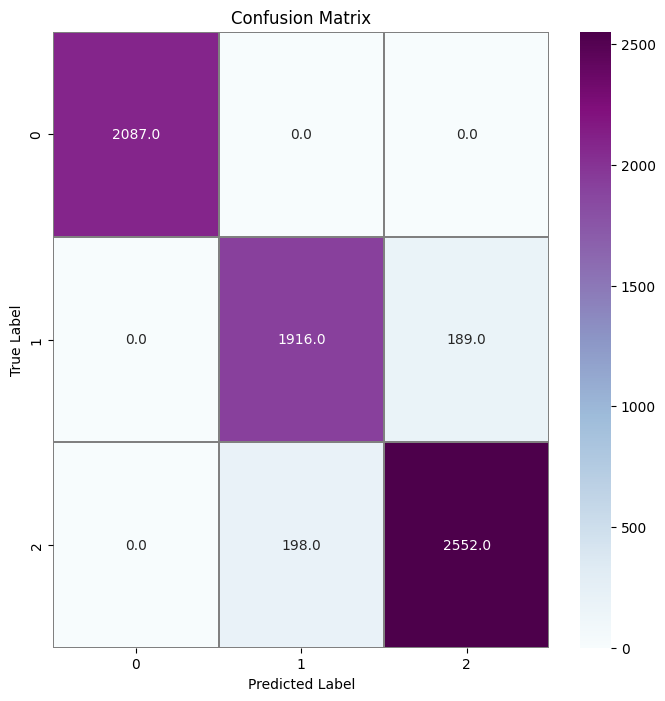

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you already have predictions and true labels
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(y_test, axis=1)  # Assuming y_test_one_hot is one-hot encoded

# Compute confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='.1f', cmap="BuPu", linewidths=0.01, linecolor="gray")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


### Model accuracy plot

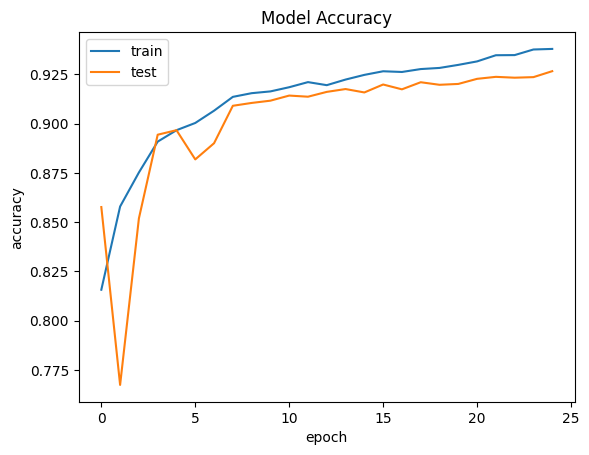

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model loss plot

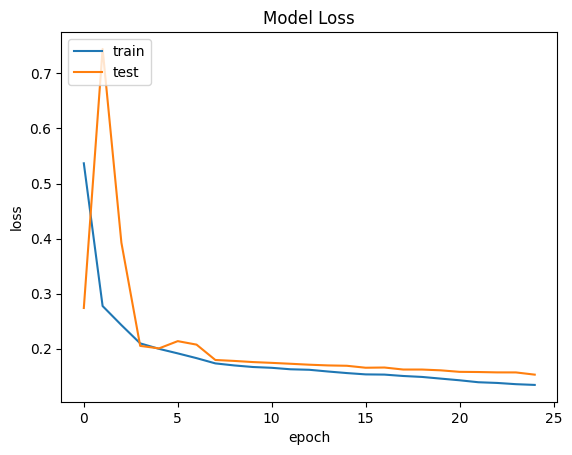

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()